In [1]:
import tensorflow as tf

### Creating a data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

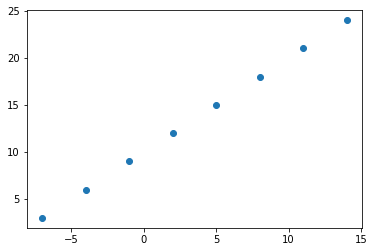

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [5]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[0].shape, y[0].shape # No shape --> scalar

((), ())

In [9]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the functions which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model to try to find the patterns between X and y (features and labels)

***A model can also be created with this way:***

model = keras.Sequential()

model.add(layers.Dense(2, activation="relu"))

model.add(layers.Dense(3, activation="relu"))

model.add(layers.Dense(4))

To remove one of the layers:

model.pop()

print(len(model.layers))  # 2

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1- Creating a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2 - Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) # sgd is short for stochastic gradient descent

# 3 - Fit the model
model.fit(X, y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 1s 660ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [14]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - We might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer

2. **Compiling the model** - We might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting the model** - We might fit a model for more epochs(leave it training for longer) or on more data (give the model more examples to learn from)

In [17]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)     
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train it for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4411 - mae: 10.4411
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3086 - mae: 10.3086
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1761 - mae: 10.1761
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0436 - mae: 10.0436
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9111 - mae: 9.9111
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7786 - mae: 9.7786
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6461 - mae: 9.6461
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5136 - mae: 9.5136
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3811 - mae: 9.3811
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - 

In [18]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Let's see if our model's prediction has improved
y_pred = model.predict([17.0])
y_pred

array([[29.901575]], dtype=float32)

It is much better than before. Last time we got 12 and this time we get 29